# Tarea AG
# Alexander Alzate - Mateo Arroyave

## Punto 2 - Agrupamiento

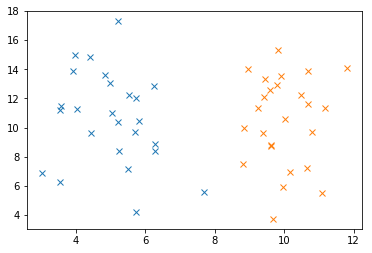

In [4]:
%matplotlib inline
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

Fitness=[]
indice=[]        #Lista que contiene los indices de los clusters segun cada grupo
cromosomas=50     #Tamaño de la poblacion (filas) - Cromosomas
genes=50         #Numero de Genes
K=2               #Cluster

#Creación de los datos
mean = [5, 10]            
cov = [[1, 0], [0, 10]]  # diagonal covariance
x1, x2 = np.random.multivariate_normal(mean, cov, int(genes/2)).T
plt.plot(x1, x2, 'x')
X_C1 = np.concatenate((x1[:,None],x2[:,None]),axis=1)  #Concatena [x1,x2] y genera vector de tuplas

mean = [10, 10]
cov = [[1, 0], [0, 10]]  # diagonal covariance
x1, x2 = np.random.multivariate_normal(mean, cov, int(genes/2)).T
plt.plot(x1, x2, 'x')
plt.show()
X_C2 = np.concatenate((x1[:,None],x2[:,None]),axis=1)  #Concatena [x1,x2] y genera vector de tuplas

Xdata = np.concatenate((X_C1,X_C2),axis=0)
#plt.plot(Xdata[:,0], Xdata[:,1], 'x')
#plt.show()

In [5]:
poblacion=[]
for j in range(cromosomas):
    poblacion.append(np.random.randint(1,K+1,genes))    #Genera vector de etiquetas Random
poblacion=np.array(poblacion)
#print(poblacion)
#print(np.shape(poblacion))    

### Obtención de los indices etiquetados

In [6]:
K=4
def IndicesEtiqueta(poblacion,K):
    indice=[]
    for j in range (0,len(poblacion)):
        for i in range(1,K+1):
            indice.append(np.where(poblacion[j,:]==i)[0])
            #print(indice)    #Contiene los indices de cada cluster
            #print(indice[0])
    arreglo_indices=np.array(indice)
    indices=indice
    indice=[]
    print(indices)
    return indices

indices_final = IndicesEtiqueta(poblacion,K)


[array([ 4,  5,  7,  8,  9, 13, 15, 16, 21, 23, 24, 25, 26, 31, 36, 37, 38,
       40, 41, 47, 49], dtype=int64), array([ 0,  1,  2,  3,  6, 10, 11, 12, 14, 17, 18, 19, 20, 22, 27, 28, 29,
       30, 32, 33, 34, 35, 39, 42, 43, 44, 45, 46, 48], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([ 1,  2,  3,  5,  6,  7,  9, 10, 11, 14, 15, 16, 17, 20, 21, 23, 24,
       27, 28, 29, 31, 34, 43, 44, 45], dtype=int64), array([ 0,  4,  8, 12, 13, 18, 19, 22, 25, 26, 30, 32, 33, 35, 36, 37, 38,
       39, 40, 41, 42, 46, 47, 48, 49], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([ 0,  1,  2,  4,  6,  7,  8,  9, 10, 11, 14, 15, 17, 19, 20, 22, 23,
       24, 25, 27, 29, 35, 36, 38, 39, 41, 42, 43, 44, 45, 48, 49],
      dtype=int64), array([ 3,  5, 12, 13, 16, 18, 21, 26, 28, 30, 31, 32, 33, 34, 37, 40, 46,
       47], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([ 1,  3,  4,  6,  7,  8,  9, 12, 16, 17, 19, 20, 21, 22, 25, 27, 29,


In [7]:
def FuncionObjetivo(cromosomas,K,indices_final,Xdata):
    Fitness=[]
    for c in range(cromosomas):
        fitness_acum=0
        for g in range (K):
            eleccion_grupo=(c*K+g)
            for v1 in range (len(indices_final[eleccion_grupo])):
                for v2 in range (v1,len(indices_final[eleccion_grupo])):
                    a=Xdata[indices_final[eleccion_grupo][v1]]
                    b=Xdata[indices_final[eleccion_grupo][v2]]
                    fitness_acum+=distance.euclidean(a,b)
        #print(fitness_acum)
        fitness_total_cr = 1/fitness_acum
        Fitness.append(fitness_total_cr)
    #print(Fitness)
    return Fitness
aaaa=FuncionObjetivo(10,4,indices_final,Xdata)
print(aaaa)

[0.00030656006530335495, 0.00032455390478089105, 0.00030438116803249655, 0.0003090400450760125, 0.00031404644608889803, 0.0002965305876650621, 0.00030664625314972546, 0.00031605352775535787, 0.0002869815667450935, 0.00031747745176323715]


In [8]:
#Prueba de la fución distance.euclidean()
distance.euclidean(Xdata[0,:],Xdata[1,:])

1.6156017279360229

In [9]:
print(Xdata[0,:])
print(Xdata[1,:])

[ 4.8359746  13.62821372]
[ 3.97448422 14.99496288]


### Wheel

In [10]:
Tm=0.4            #Tasa de mutacion 
Tc=0.4            #Tasa de cruce  Porcentaje de parejas van a ser seleccionadas para el cruce
N_gen=500         #Numero de generaciones
alpha= 0.6        #For aritmetic recombination

In [11]:
def CruceMultipunto(a,b):
    cruce1 = np.random.randint(0,len(a))#Primer punto de cruce
    cruce2 = 1+np.random.randint(cruce1,len(a))#Se le suma 1 para que el segundo cruce se haga al menos una posicion más allá 
    print("corte1: ",cruce1)
    print("corte2: ",cruce2-1)
    temp = np.zeros(len(a))
    temp[cruce1:cruce2] = b[cruce1:cruce2]
    b[cruce1:cruce2] = a[cruce1:cruce2]
    a[cruce1:cruce2]=temp[cruce1:cruce2]
    return a,b

def Mutacion_RandomResetting(a,K):
    gen1_elegido=np.random.randint(0,len(a)) #Se escoge el gen para mutar aleatoriamente 
    print("gen elegido para mutar: ",gen1_elegido)
    resetting=np.random.randint(1,K+1)#mutación
    print("Resetting: ",resetting)
    a[gen1_elegido]=resetting
    #print("cromosoma 'a' mutado: ",a)
    return a


mejor_fitness=[]
for gen in range(N_gen):
    
    print("Poblacion Inicial")
    
    print(poblacion)
    
    # Fitness evaluation
    Fitness = np.array(FuncionObjetivo(cromosomas,K,indices_final,Xdata))
    #print(Fitness)
    BestIndividuos = np.argsort(-Fitness)
    
    print("Poblacion Cambio 1")
    
    poblacion = poblacion[BestIndividuos]
    
    print(poblacion)
    
    Wheel = np.cumsum(Fitness[BestIndividuos])/np.sum(Fitness[BestIndividuos])
    
    # Crossover - Wheel 
    
    for parent in range(int(Tc*cromosomas/2)):
        P = np.random.rand(1)
        ParentSelected_1 = np.where(Wheel >= P)[0][0]
        print("Parent1: ")        
        print(poblacion[ParentSelected_1])
        
        P = np.random.rand(1)
        ParentSelected_2 = np.where(Wheel >= P)[0][0]
        print("Parent2: ")        
        print(poblacion[ParentSelected_2])
        
        #Crossover Aritmetic recombination
        #Child_1 = (1-alpha)*poblacion[ParentSelected_1] + alpha*poblacion[ParentSelected_2]
        #Child_2 = alpha*poblacion[ParentSelected_1] + (1-alpha)*poblacion[ParentSelected_2]
        
        #Cruce Multipunto 
        Child_1 ,Child_2 = CruceMultipunto(poblacion[ParentSelected_1],poblacion[ParentSelected_2])
        
        print("Child_1")        
        print(Child_1)
        print("Child_2")        
        print(Child_2)
        #print("Poblacion Cambio 2")
    
        #Add to population
        poblacion = np.append(poblacion,Child_1[None,:],axis=0)
        
        print("Poblacion len")
        print(len(poblacion))
    
        poblacion = np.append(poblacion,Child_2[None,:],axis=0)
        
        print(poblacion)
    
    # Mutation - Wheel
    for parent in range(int(Tm*cromosomas)):
        P = np.random.rand(1)
        ParentSelected = np.where(Wheel >= P)[0][0]
        
        #Add to population
        Mutacion = Mutacion_RandomResetting(poblacion[ParentSelected],K) #Mutación Random resetting
        print("Mutacion child1: ",Mutacion)
        poblacion = np.append(poblacion,Mutacion[None,:],axis=0)
        
        print("Poblacion cambio 3")
        
        print(poblacion)
        
    #Selection
    for j in range (0,len(poblacion)):
        for i in range(1,K+1):
            indice.append(np.where(poblacion[j,:]==i)[0])
        #print(indice)    #Contiene los indices de cada cluster
        #print(indice[0])
    arreglo_indices=np.array(indice)
    indices_final=indice
    indice=[]
    Fitness = np.array(FuncionObjetivo(len(poblacion),K,indices_final,Xdata))
    
    print("Poblacion Final")
    
    print(poblacion)
    
    BestIndividuos = np.argsort(-Fitness)
    poblacion = poblacion[BestIndividuos[:cromosomas]]
    Fitness = Fitness[BestIndividuos]
    print("gen",gen)
    mejor_fitness.append(Fitness[0])
    #plt.plot(gen,Fitness[0],'.')    
#plt.show()

Poblacion Inicial
[[2 2 2 ... 1 2 1]
 [2 1 1 ... 2 2 2]
 [1 1 1 ... 2 1 1]
 ...
 [1 2 1 ... 1 2 1]
 [2 1 1 ... 1 1 1]
 [1 1 1 ... 1 2 1]]
Poblacion Cambio 1
[[1 1 1 ... 2 2 2]
 [2 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 2]
 ...
 [1 1 2 ... 1 1 1]
 [1 2 1 ... 2 1 1]
 [1 2 2 ... 2 1 2]]
Parent1: 
[1 2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 1 2
 2 2 2 1 1 2 2 1 2 1 2 1 2]
Parent2: 
[2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 1 1 2
 1 2 1 2 2 2 2 2 2 2 2 2 2]
corte1:  22
corte2:  44
Child_1
[1 2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 1 1 2
 1 2 1 2 2 2 2 2 2 1 2 1 2]
Child_2
[2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 1 2
 2 2 2 1 1 2 2 1 2 2 2 2 2]
Poblacion len
51
[[1 1 1 ... 2 2 2]
 [2 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 2]
 ...
 [1 2 2 ... 2 1 2]
 [1 2 2 ... 2 1 2]
 [2 1 2 ... 2 2 2]]
Parent1: 
[1 1 1 2 2 1 2 2 2 1 1 2 2 1 1 2 1 1 2 2 2 1 2 2 1 1 2 2 2 1 2 1 2 1 2 2 2
 1 2 2 2 2 2 1 2 2 2 2 2 1]
P

Poblacion Final
[[1 1 1 ... 2 2 2]
 [2 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 2]
 ...
 [1 1 2 ... 1 2 2]
 [1 2 2 ... 2 1 1]
 [1 1 1 ... 2 1 1]]
gen 0
Poblacion Inicial
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 2 2 ... 2 2 3]
 ...
 [1 1 1 ... 1 2 1]
 [1 1 2 ... 1 2 2]
 [1 1 2 ... 1 2 2]]
Poblacion Cambio 1
[[1 1 1 ... 2 2 2]
 [1 2 2 ... 2 1 1]
 [1 2 2 ... 2 2 3]
 ...
 [1 1 2 ... 1 2 2]
 [1 1 2 ... 1 2 2]
 [1 1 2 ... 2 1 1]]
Parent1: 
[1 2 2 2 1 1 2 1 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1 2 2 1 2 2 1 2 2
 2 1 1 1 1 2 1 1 2 2 2 2 3]
Parent2: 
[1 1 2 2 2 1 1 1 2 2 1 2 2 2 1 1 1 2 2 2 1 1 2 2 2 1 2 2 2 1 1 1 1 1 2 2 1
 2 1 2 1 2 1 2 1 1 1 2 1 1]
corte1:  17
corte2:  29
Child_1
[1 2 2 2 1 1 2 1 1 2 2 2 2 1 1 1 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2
 2 1 1 1 1 2 1 1 2 2 2 2 3]
Child_2
[1 1 2 2 2 1 1 1 2 2 1 2 2 2 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1
 2 1 2 1 2 1 2 1 1 1 2 1 1]
Poblacion len
51
[[1 1 1 ... 2 2 2]
 [1 2 2 ... 2 1 1]
 [1 2 2 ... 2 2 3]
 ...
 [1 1 2 ... 2 1 1]
 [1 2 2 ...

Poblacion Final
[[1 1 1 ... 2 2 2]
 [1 2 2 ... 2 1 1]
 [1 2 2 ... 2 2 3]
 ...
 [2 1 1 ... 1 2 2]
 [1 1 1 ... 2 1 2]
 [1 2 3 ... 1 1 1]]
gen 1
Poblacion Inicial
[[2 1 1 ... 1 2 2]
 [2 1 1 ... 1 2 2]
 [1 1 1 ... 1 1 2]
 ...
 [1 2 2 ... 2 2 1]
 [1 2 2 ... 2 2 1]
 [1 1 1 ... 1 1 2]]
Poblacion Cambio 1
[[1 2 2 ... 2 1 1]
 [2 1 1 ... 1 1 1]
 [1 2 2 ... 2 2 3]
 ...
 [1 1 1 ... 2 2 2]
 [2 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 2]]
Parent1: 
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 1 1 1 2 2 2 1 2 1 2 2 2 2 1 1 1 4 2 1
 2 2 1 1 1 2 2 3 1 2 1 1 2]
Parent2: 
[1 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 2 2 1 2 2 2 2 2 2 2 2]
corte1:  46
corte2:  48
Child_1
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 1 1 1 2 2 2 1 2 1 2 2 2 2 1 1 1 4 2 1
 2 2 1 1 1 2 2 3 1 2 2 2 2]
Child_2
[1 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 2 2 1 2 2 2 2 2 1 1 2]
Poblacion len
51
[[1 2 2 ... 2 1 1]
 [2 1 1 ... 1 1 1]
 [1 2 2 ... 2 2 3]
 ...
 [1 1 1 ... 1 1 2]
 [1 1 1 ...

Poblacion Final
[[1 2 2 ... 2 2 1]
 [2 1 1 ... 1 1 1]
 [1 2 2 ... 2 2 3]
 ...
 [1 2 2 ... 2 2 3]
 [2 1 1 ... 2 2 2]
 [3 1 1 ... 1 2 2]]
gen 2
Poblacion Inicial
[[3 1 1 ... 1 2 2]
 [3 1 1 ... 1 2 2]
 [3 1 1 ... 1 2 2]
 ...
 [1 2 2 ... 2 1 1]
 [1 1 1 ... 2 1 1]
 [1 1 1 ... 2 2 1]]
Poblacion Cambio 1
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 2]
 [1 1 1 ... 2 2 2]
 ...
 [2 1 1 ... 1 1 1]
 [1 1 1 ... 2 2 2]
 [2 1 1 ... 1 1 2]]
Parent1: 
[2 1 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 1 2 1 2 2 1 3 2
 2 2 2 2 2 2 1 1 1 2 2 2 2]
Parent2: 
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 1 1 1 2 1 1 1 2 2 1 4 1 1 1 2 1 1 1 2 2 4 2 1
 2 1 2 2 1 1 2 2 1 1 1 2 2]
corte1:  48
corte2:  48
Child_1
[2 1 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 1 2 1 2 2 1 3 2
 2 2 2 2 2 2 1 1 1 2 2 2 2]
Child_2
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 1 1 1 2 1 1 1 2 2 1 4 1 1 1 2 1 1 1 2 2 4 2 1
 2 1 2 2 1 1 2 2 1 1 1 2 2]
Poblacion len
51
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 2]
 [1 1 1 ... 2 2 2]
 ...
 [2 1 1 ... 1 1 2]
 [2 1 1 ...

Poblacion Final
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 2]
 [1 1 1 ... 2 2 2]
 ...
 [2 1 1 ... 1 2 2]
 [1 2 2 ... 2 2 3]
 [2 1 1 ... 1 1 2]]
gen 3
Poblacion Inicial
[[1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 [2 1 1 ... 1 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [2 1 1 ... 1 2 2]]
Poblacion Cambio 1
[[1 1 1 ... 2 2 2]
 [1 2 2 ... 2 2 3]
 [2 1 1 ... 1 2 2]
 ...
 [3 1 1 ... 1 2 2]
 [1 2 2 ... 2 2 3]
 [2 1 1 ... 1 2 2]]
Parent1: 
[1 2 2 2 1 1 2 1 1 3 2 1 1 2 2 1 1 1 4 2 1 1 2 1 1 1 1 2 1 2 2 1 2 2 1 2 1
 2 1 2 2 1 2 2 1 2 2 2 2 3]
Parent2: 
[1 2 2 2 1 1 2 1 1 3 2 1 1 2 2 1 1 1 4 2 1 1 2 1 1 1 1 2 1 2 2 1 2 2 1 2 1
 2 1 2 2 1 2 2 1 2 2 2 2 3]
corte1:  37
corte2:  47
Child_1
[1 2 2 2 1 1 2 1 1 3 2 1 1 2 2 1 1 1 4 2 1 1 2 1 1 1 1 2 1 2 2 1 2 2 1 2 1
 2 1 2 2 1 2 2 1 2 2 2 2 3]
Child_2
[1 2 2 2 1 1 2 1 1 3 2 1 1 2 2 1 1 1 4 2 1 1 2 1 1 1 1 2 1 2 2 1 2 2 1 2 1
 2 1 2 2 1 2 2 1 2 2 2 2 3]
Poblacion len
51
[[1 1 1 ... 2 2 2]
 [1 2 2 ... 2 2 3]
 [2 1 1 ... 1 2 2]
 ...
 [2 1 1 ... 1 2 2]
 [1 2 2 ...

Poblacion Final
[[1 1 1 ... 1 2 2]
 [1 2 2 ... 2 2 3]
 [2 1 1 ... 1 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [1 2 2 ... 2 2 3]
 [2 1 1 ... 1 2 2]]
gen 4
Poblacion Inicial
[[3 1 1 ... 2 2 2]
 [3 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 2]
 ...
 [1 1 1 ... 2 2 2]
 [2 1 1 ... 1 1 1]
 [2 1 1 ... 1 1 1]]
Poblacion Cambio 1
[[3 1 1 ... 1 2 2]
 [1 1 1 ... 1 1 2]
 [3 1 1 ... 1 2 2]
 ...
 [3 1 1 ... 1 2 2]
 [2 1 1 ... 1 2 2]
 [2 3 1 ... 1 1 2]]
Parent1: 
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 2 2 2 2 1 1 2 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Parent2: 
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1 1 2 2 2 1 2 1 2 2 2 2 1 3 1 4 2 1
 2 2 1 1 1 2 2 3 1 2 2 2 2]
corte1:  35
corte2:  41
Child_1
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 2 2 2 2 1 1 2 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Child_2
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1 1 2 2 2 1 2 1 2 2 2 2 1 3 1 4 2 1
 2 2 1 1 1 2 2 3 1 2 2 2 2]
Poblacion len
51
[[3 1 1 ... 1 2 2]
 [1 1 1 ... 1 1 2]
 [3 1 1 ... 1 2 2]
 ...
 [2 3 1 ... 1 1 2]
 [1 1 1 ...

Poblacion Final
[[3 1 1 ... 1 2 2]
 [1 1 1 ... 1 1 2]
 [3 1 1 ... 1 2 2]
 ...
 [2 1 1 ... 1 2 2]
 [3 1 1 ... 1 2 2]
 [2 3 1 ... 1 1 2]]
gen 5
Poblacion Inicial
[[3 1 1 ... 2 2 2]
 [3 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 2]
 ...
 [2 1 1 ... 1 1 1]
 [2 1 1 ... 1 1 1]
 [3 1 1 ... 1 2 2]]
Poblacion Cambio 1
[[1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 [2 1 1 ... 1 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [3 1 1 ... 1 2 2]
 [3 1 1 ... 2 2 2]]
Parent1: 
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 2 2 2 2 1 1 2 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Parent2: 
[3 1 1 1 1 2 1 2 2 2 1 2 2 4 1 1 1 2 1 1 1 2 2 1 4 1 1 1 2 1 1 2 2 2 4 1 1
 2 2 1 1 2 1 2 1 2 3 1 1 1]
corte1:  39
corte2:  42
Child_1
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 2 2 2 2 1 1 2 4 2 1
 2 2 1 1 2 1 2 3 1 3 1 1 2]
Child_2
[3 1 1 1 1 2 1 2 2 2 1 2 2 4 1 1 1 2 1 1 1 2 2 1 4 1 1 1 2 1 1 2 2 2 4 1 1
 2 2 1 1 1 2 2 1 2 3 1 1 1]
Poblacion len
51
[[1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 [2 1 1 ... 1 2 2]
 ...
 [3 1 1 ... 2 2 2]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 4]
 [2 1 1 ... 1 2 2]
 ...
 [1 1 1 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 [1 1 1 ... 1 1 2]]
gen 6
Poblacion Inicial
[[2 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 ...
 [2 1 1 ... 1 1 1]
 [2 1 1 ... 1 1 1]
 [3 1 1 ... 1 2 2]]
Poblacion Cambio 1
[[1 1 4 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 4]
 ...
 [2 3 1 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 [3 1 1 ... 1 2 2]]
Parent1: 
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 4 2 2 2 1 1 2 1 1 2
 3 1 1 1 2 1 2 3 1 3 1 1 4]
Parent2: 
[1 1 1 4 2 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1 1 2 2 2 1 2 3 2 2 2 4 1 1 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 2 2]
corte1:  48
corte2:  48
Child_1
[1 1 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 4 2 2 2 1 1 2 1 1 2
 3 1 1 1 2 1 2 3 1 3 1 2 4]
Child_2
[1 1 1 4 2 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1 1 2 2 2 1 2 3 2 2 2 4 1 1 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Poblacion len
51
[[1 1 4 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 4]
 ...
 [3 1 1 ... 1 2 2]
 [1 1 1 ...

Poblacion Final
[[1 1 4 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 4]
 ...
 [3 1 1 ... 2 2 2]
 [2 1 1 ... 1 1 2]
 [2 1 1 ... 2 1 2]]
gen 7
Poblacion Inicial
[[1 1 4 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 ...
 [1 1 1 ... 1 1 2]
 [1 1 1 ... 1 2 4]
 [1 1 1 ... 1 1 2]]
Poblacion Cambio 1
[[1 1 4 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 ...
 [2 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]]
Parent1: 
[1 1 4 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 2 2 1 1 1 3 1 4 2 1
 2 2 4 2 4 2 2 3 1 3 1 1 2]
Parent2: 
[1 1 4 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 3 2 2 1 1 1 2 2 4 1 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
corte1:  38
corte2:  49
Child_1
[1 1 4 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 2 2 1 1 1 3 1 4 2 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
Child_2
[1 1 4 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 3 2 2 1 1 1 2 2 4 1 1
 2 2 4 2 4 2 2 3 1 3 1 1 2]
Poblacion len
51
[[1 1 4 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 ...
 [3 1 1 ... 1 1 2]
 [1 1 4 ...

Poblacion Final
[[1 1 4 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 ...
 [1 1 1 ... 1 2 2]
 [1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 2]]
gen 8
Poblacion Inicial
[[3 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 ...
 [1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 2]]
Poblacion Cambio 1
[[1 1 4 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 ...
 [1 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 3]]
Parent1: 
[1 1 4 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 2 2 1 1 1 3 1 4 2 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
Parent2: 
[2 1 1 4 2 2 1 2 2 2 1 2 2 4 1 1 1 4 2 1 1 2 2 2 1 2 1 2 2 2 3 1 3 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
corte1:  45
corte2:  48
Child_1
[1 1 4 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 4 1 1 2 2 2 1 2 1 2 2 1 1 1 3 1 4 2 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
Child_2
[2 1 1 4 2 2 1 2 2 2 1 2 2 4 1 1 1 4 2 1 1 2 2 2 1 2 1 2 2 2 3 1 3 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Poblacion len
51
[[1 1 4 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 ...
 [3 1 1 ... 1 1 3]
 [1 1 4 ...

Poblacion Final
[[1 1 4 ... 1 2 2]
 [3 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 ...
 [1 1 1 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 [1 1 4 ... 1 1 2]]
gen 9
Poblacion Inicial
[[3 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 [1 1 4 ... 1 2 2]
 ...
 [2 1 1 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 [3 1 1 ... 1 1 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 ...
 [1 1 4 ... 1 1 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 1 1 2]]
Parent1: 
[2 1 1 4 2 2 1 2 2 2 1 2 2 4 1 1 1 4 2 1 1 2 2 1 4 1 1 1 2 2 3 1 1 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Parent2: 
[2 1 1 4 2 2 1 2 2 2 1 2 2 4 1 1 1 4 2 1 1 2 2 1 4 1 1 1 2 2 3 1 1 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
corte1:  18
corte2:  35
Child_1
[2 1 1 4 2 2 1 2 2 2 1 2 2 4 1 1 1 4 2 1 1 2 2 1 4 1 1 1 2 2 3 1 1 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Child_2
[2 1 1 4 2 2 1 2 2 2 1 2 2 4 1 1 1 4 2 1 1 2 2 1 4 1 1 1 2 2 3 1 1 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Poblacion len
51
[[3 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 ...
 [3 1 1 ... 1 1 2]
 [2 1 1 ...

Poblacion Final
[[3 1 1 ... 1 1 2]
 [2 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 ...
 [2 1 4 ... 3 1 2]
 [3 1 1 ... 1 1 3]
 [2 1 4 ... 1 1 2]]
gen 10
Poblacion Inicial
[[4 1 1 ... 1 1 2]
 [4 1 1 ... 1 1 2]
 [3 1 1 ... 1 3 2]
 ...
 [2 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 1 3]
 [2 1 1 ... 1 4 2]
 [4 1 1 ... 1 1 2]
 ...
 [3 1 1 ... 2 2 2]
 [1 1 4 ... 1 1 2]
 [1 1 4 ... 1 1 2]]
Parent1: 
[2 1 1 4 2 2 1 2 2 2 1 2 2 4 2 2 2 1 4 1 1 2 2 3 1 2 1 2 3 1 1 1 2 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Parent2: 
[1 1 1 2 4 1 1 2 1 1 1 2 2 2 2 2 2 3 4 1 1 2 2 2 1 2 1 2 3 1 1 1 2 2 4 1 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
corte1:  19
corte2:  45
Child_1
[2 1 1 4 2 2 1 2 2 2 1 2 2 4 2 2 2 1 4 1 1 2 2 2 1 2 1 2 3 1 1 1 2 2 4 1 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
Child_2
[1 1 1 2 4 1 1 2 1 1 1 2 2 2 2 2 2 3 4 1 1 2 2 3 1 2 1 2 3 1 1 1 2 1 4 2 1
 2 2 1 1 1 2 2 3 1 3 1 1 2]
Poblacion len
51
[[3 1 1 ... 1 1 3]
 [2 1 1 ... 1 4 2]
 [4 1 1 ... 1 1 2]
 ...
 [1 1 4 ... 1 1 2]
 [2 1 1 ..

Poblacion Final
[[3 1 1 ... 1 1 3]
 [2 1 1 ... 1 4 2]
 [4 1 1 ... 1 1 2]
 ...
 [1 1 4 ... 1 2 2]
 [4 1 1 ... 1 1 2]
 [3 1 1 ... 1 1 3]]
gen 11
Poblacion Inicial
[[4 2 1 ... 1 1 2]
 [4 2 1 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 ...
 [2 1 1 ... 1 4 2]
 [2 1 1 ... 1 4 2]
 [1 1 4 ... 3 1 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 ...
 [3 1 1 ... 1 1 3]
 [2 1 1 ... 1 4 2]
 [3 1 1 ... 1 1 3]]
Parent1: 
[1 1 1 2 4 1 1 2 1 1 1 2 2 2 2 2 2 3 4 1 1 2 2 3 1 2 1 2 3 1 1 1 2 2 4 1 1
 3 1 2 2 1 3 2 3 1 3 1 1 2]
Parent2: 
[1 1 1 2 4 1 1 2 1 1 1 2 2 2 1 2 3 1 4 1 1 2 2 2 1 2 1 2 2 2 3 1 3 2 4 1 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
corte1:  32
corte2:  43
Child_1
[1 1 1 2 4 1 1 2 1 1 1 2 2 2 2 2 2 3 4 1 1 2 2 3 1 2 1 2 3 1 1 1 3 2 4 1 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
Child_2
[1 1 1 2 4 1 1 2 1 1 1 2 2 2 1 2 3 1 4 1 1 2 2 2 1 2 1 2 2 2 3 1 2 2 4 1 1
 3 1 2 2 1 3 2 3 1 3 1 1 2]
Poblacion len
51
[[3 1 1 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 ...
 [3 1 1 ... 1 1 3]
 [1 1 1 ..

Poblacion Final
[[3 1 1 ... 1 1 2]
 [1 1 4 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 ...
 [3 1 1 ... 1 3 2]
 [2 1 1 ... 1 1 2]
 [1 1 4 ... 3 1 2]]
gen 12
Poblacion Inicial
[[4 2 1 ... 1 1 2]
 [4 2 1 ... 1 1 2]
 [4 2 1 ... 1 1 2]
 ...
 [1 1 1 ... 1 2 2]
 [1 1 4 ... 1 2 2]
 [1 1 4 ... 1 2 2]]
Poblacion Cambio 1
[[1 1 1 ... 1 1 2]
 [1 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 ...
 [2 1 1 ... 1 4 2]
 [2 1 1 ... 1 1 2]
 [1 1 4 ... 1 2 2]]
Parent1: 
[1 1 4 2 2 1 1 2 1 1 1 2 4 2 2 3 2 1 1 1 1 2 2 3 4 3 3 2 2 1 1 1 2 2 4 1 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
Parent2: 
[1 1 1 2 4 1 1 2 1 1 1 2 2 2 2 2 2 3 4 1 1 2 2 2 1 2 1 2 3 1 1 1 2 2 4 1 1
 2 1 4 2 4 2 2 3 1 3 1 2 2]
corte1:  4
corte2:  44
Child_1
[1 1 4 2 4 1 1 2 1 1 1 2 2 2 2 2 2 3 4 1 1 2 2 2 1 2 1 2 3 1 1 1 2 2 4 1 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
Child_2
[1 1 1 2 2 1 1 2 1 1 1 2 4 2 2 3 2 1 1 1 1 2 2 3 4 3 3 2 2 1 1 1 2 2 4 1 1
 2 1 4 2 4 2 2 3 1 3 1 2 2]
Poblacion len
51
[[1 1 1 ... 1 1 2]
 [1 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 4 ... 1 2 2]
 [1 1 4 ...

Poblacion Final
[[1 1 1 ... 1 1 2]
 [1 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 1 ... 1 1 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 1 2]]
gen 13
Poblacion Inicial
[[1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 2]
 [1 4 4 ... 1 2 2]
 ...
 [1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 2]
 [4 1 1 ... 1 1 2]]
Poblacion Cambio 1
[[4 1 1 ... 1 1 2]
 [1 4 4 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 1 ... 1 2 2]
 [1 1 1 ... 1 1 2]
 [1 1 4 ... 3 1 2]]
Parent1: 
[1 1 1 2 4 1 1 2 1 3 1 2 2 2 2 2 2 3 4 1 1 2 2 3 1 2 1 2 3 1 1 1 3 2 4 1 1
 2 1 4 2 4 2 3 3 1 3 1 1 2]
Parent2: 
[1 1 1 2 4 1 1 4 1 1 1 2 2 2 2 2 2 3 4 1 1 2 2 2 1 2 1 2 3 1 1 1 2 2 4 3 1
 2 4 4 2 4 2 2 3 1 3 1 2 2]
corte1:  1
corte2:  49
Child_1
[1 1 1 2 4 1 1 4 1 1 1 2 2 2 2 2 2 3 4 1 1 2 2 2 1 2 1 2 3 1 1 1 2 2 4 3 1
 2 4 4 2 4 2 2 3 1 3 1 2 2]
Child_2
[1 1 1 2 4 1 1 2 1 3 1 2 2 2 2 2 2 3 4 1 1 2 2 3 1 2 1 2 3 1 1 1 3 2 4 1 1
 2 1 4 2 4 2 3 3 1 3 1 1 2]
Poblacion len
51
[[4 1 1 ... 1 1 2]
 [1 4 4 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 4 ... 3 1 2]
 [1 1 1 ...

Poblacion Final
[[4 1 1 ... 3 1 2]
 [1 4 4 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 4 ... 1 1 2]
 [4 1 1 ... 1 1 2]
 [1 1 1 ... 1 2 1]]
gen 14
Poblacion Inicial
[[1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 2]
 ...
 [1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[1 4 4 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [4 1 1 ... 1 1 2]
 [3 1 1 ... 1 3 2]
 [1 1 1 ... 1 1 2]]
Parent1: 
[3 1 1 1 2 2 1 2 1 1 1 2 2 4 1 1 1 4 2 1 1 2 2 3 1 2 1 2 2 2 3 1 3 1 4 2 1
 2 4 4 2 4 2 2 3 1 3 1 1 3]
Parent2: 
[4 1 1 1 1 2 2 2 1 1 1 2 2 3 3 2 1 3 4 1 1 2 2 2 1 2 1 2 2 1 1 1 3 1 4 2 1
 2 1 4 2 4 2 2 3 1 3 1 1 2]
corte1:  11
corte2:  45
Child_1
[3 1 1 1 2 2 1 2 1 1 1 2 2 3 3 2 1 3 4 1 1 2 2 2 1 2 1 2 2 1 1 1 3 1 4 2 1
 2 1 4 2 4 2 2 3 1 3 1 1 3]
Child_2
[4 1 1 1 1 2 2 2 1 1 1 2 2 4 1 1 1 4 2 1 1 2 2 3 1 2 1 2 2 2 3 1 3 1 4 2 1
 2 4 4 2 4 2 2 3 1 3 1 1 2]
Poblacion len
51
[[1 4 4 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 1 ... 1 1 2]
 [3 1 1 ..

Poblacion Final
[[1 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 4 ... 1 1 2]
 [3 1 1 ... 1 3 2]
 [4 1 1 ... 3 1 2]]
gen 15
Poblacion Inicial
[[1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 2]
 ...
 [1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 2]
 [4 1 1 ... 1 1 2]]
Poblacion Cambio 1
[[1 4 4 ... 1 2 2]
 [1 1 1 ... 1 2 1]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 2 2 4 1 1
 2 1 2 2 4 2 2 3 1 3 1 3 2]
Parent2: 
[1 1 4 2 2 1 1 2 2 2 1 2 3 4 4 1 2 1 4 1 1 2 2 2 1 2 3 2 2 1 1 1 3 1 4 2 1
 2 1 4 2 4 2 1 4 3 3 1 1 2]
corte1:  26
corte2:  45
Child_1
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 3 2 2 1 1 1 3 1 4 2 1
 2 1 4 2 4 2 1 4 3 3 1 3 2]
Child_2
[1 1 4 2 2 1 1 2 2 2 1 2 3 4 4 1 2 1 4 1 1 2 2 2 1 2 1 1 3 1 1 1 2 2 4 1 1
 2 1 2 2 4 2 2 3 1 3 1 1 2]
Poblacion len
51
[[1 4 4 ... 1 2 2]
 [1 1 1 ... 1 2 1]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ..

Poblacion Final
[[1 4 4 ... 1 2 2]
 [1 1 1 ... 1 2 1]
 [3 1 1 ... 1 3 2]
 ...
 [4 2 1 ... 1 1 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 16
Poblacion Inicial
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[4 2 1 ... 1 1 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 1]
 [1 1 1 ... 1 2 1]]
Parent1: 
[3 1 1 1 1 4 1 2 4 2 1 2 3 4 4 1 1 2 1 1 1 2 2 4 4 1 1 1 2 2 3 3 3 1 4 1 1
 2 1 4 2 4 2 2 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 1 4 3 1 2 2 2 1 2 1 2 3 1 3 1 3 1 4 1 1
 2 1 2 2 4 2 2 3 4 3 1 3 2]
corte1:  28
corte2:  46
Child_1
[3 1 1 1 1 4 1 2 4 2 1 2 3 4 4 1 1 2 1 1 1 2 2 4 4 1 1 1 3 1 3 1 3 1 4 1 1
 2 1 2 2 4 2 2 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 1 4 3 1 2 2 2 1 2 1 2 2 2 3 3 3 1 4 1 1
 2 1 4 2 4 2 2 3 4 3 1 3 2]
Poblacion len
51
[[4 2 1 ... 1 1 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 1 ... 1 2 1]
 [3 1 1 ..

Poblacion Final
[[4 1 1 ... 1 1 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 1 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 4 ... 1 3 2]
 [1 1 1 ... 1 2 2]]
gen 17
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [1 4 4 ... 1 2 2]]
Poblacion Cambio 1
[[3 2 1 ... 4 3 2]
 [3 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 1 ... 1 2 4]
 [3 1 1 ... 1 3 2]
 [1 4 4 ... 1 2 2]]
Parent1: 
[3 1 1 1 3 2 1 2 4 2 1 2 3 4 4 1 1 4 4 1 1 2 2 2 1 2 3 2 2 1 1 1 3 1 4 2 1
 2 1 4 2 4 2 1 4 3 3 1 3 2]
Parent2: 
[3 1 1 1 1 4 1 2 4 2 1 2 3 4 4 1 1 2 1 1 1 2 2 4 4 1 1 1 2 2 3 3 3 1 4 1 1
 2 1 4 2 4 2 2 3 4 3 1 3 2]
corte1:  3
corte2:  40
Child_1
[3 1 1 1 1 4 1 2 4 2 1 2 3 4 4 1 1 2 1 1 1 2 2 4 4 1 1 1 2 2 3 3 3 1 4 1 1
 2 1 4 2 4 2 1 4 3 3 1 3 2]
Child_2
[3 1 1 1 3 2 1 2 4 2 1 2 3 4 4 1 1 4 4 1 1 2 2 2 1 2 3 2 2 1 1 1 3 1 4 2 1
 2 1 4 2 4 2 2 3 4 3 1 3 2]
Poblacion len
51
[[3 2 1 ... 4 3 2]
 [3 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 4 4 ... 1 2 2]
 [3 1 1 ...

Poblacion Final
[[3 2 1 ... 4 3 4]
 [3 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 ...
 [1 1 1 ... 1 3 2]
 [3 2 1 ... 4 3 4]
 [1 1 4 ... 1 1 3]]
gen 18
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 1 3 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 1 2 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 2 1 ... 4 3 4]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 3 1 1 3 1 4 2 1
 2 1 4 2 4 2 1 4 3 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 1 2 1 2 1 4 3 4 4 1 2 2 1 1 1 2 2 4 4 1 1 1 3 1 1 1 2 2 4 3 1
 2 4 4 2 3 2 2 3 1 3 1 2 2]
corte1:  20
corte2:  46
Child_1
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 4 4 1 1 1 3 1 1 1 2 2 4 3 1
 2 4 4 2 3 2 2 3 1 3 1 3 2]
Child_2
[3 1 1 1 1 2 1 2 1 2 1 4 3 4 4 1 2 2 1 1 1 2 2 2 1 2 1 1 3 3 1 1 3 1 4 2 1
 2 1 4 2 4 2 1 4 3 3 1 2 2]
Poblacion len
51
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 4]
 [2 1 1 ... 1 2 2]]
gen 19
Poblacion Inicial
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 2 2]
 [3 1 1 ... 1 2 2]
 [3 1 1 ... 1 2 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 2 2]
 ...
 [3 1 2 ... 1 3 2]
 [1 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 2 2 3 4 1 1 2 2 4 4 1 1 1 3 1 1 1 2 1 4 2 1
 2 1 4 2 4 2 2 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 3 2 3 1 1 1 2 2 4 2 2
 2 1 4 4 4 2 2 3 4 3 1 3 4]
corte1:  31
corte2:  31
Child_1
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 2 2 3 4 1 1 2 2 4 4 1 1 1 3 1 1 1 2 1 4 2 1
 2 1 4 2 4 2 2 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 3 2 3 1 1 1 2 2 4 2 2
 2 1 4 4 4 2 2 3 4 3 1 3 4]
Poblacion len
51
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 2 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 2 2]
 ...
 [1 1 1 ... 1 2 2]
 [3 1 1 ... 1 3 2]
 [2 1 1 ... 1 3 2]]
gen 20
Poblacion Inicial
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [1 1 1 ... 1 2 2]
 [1 1 1 ... 1 2 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 4 1 2 4 2 1 2 3 4 4 2 2 4 4 1 1 2 2 2 1 2 3 2 3 1 1 1 2 2 4 2 2
 2 1 4 4 4 2 2 3 4 3 1 3 2]
Parent2: 
[2 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 4 4 2 4 2 2 3 2 3 4 3 2]
corte1:  8
corte2:  40
Child_1
[3 1 1 1 1 4 1 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 4 4 2 4 2 2 3 4 3 1 3 2]
Child_2
[2 1 1 1 1 2 3 2 4 2 1 2 3 4 4 2 2 4 4 1 1 2 2 2 1 2 3 2 3 1 1 1 2 2 4 2 2
 2 1 4 4 4 2 2 3 2 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 4]]
gen 21
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 3 4]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 2 2 4 3 1
 2 4 4 2 4 2 2 3 2 3 1 3 2]
Parent2: 
[3 1 1 1 3 2 1 2 4 2 1 2 3 4 4 1 1 4 4 1 1 2 2 2 1 2 1 2 3 1 1 1 2 2 4 3 1
 2 4 4 2 3 2 4 3 4 3 1 3 2]
corte1:  40
corte2:  43
Child_1
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 2 2 4 3 1
 2 4 4 2 3 2 4 3 2 3 1 3 2]
Child_2
[3 1 1 1 3 2 1 2 4 2 1 2 3 4 4 1 1 4 4 1 1 2 2 2 1 2 1 2 3 1 1 1 2 2 4 3 1
 2 4 4 2 4 2 2 3 4 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 1 3 4]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ..

Poblacion Final
[[2 1 1 ... 1 3 4]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
gen 22
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 3 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 4 4 2 4 2 2 3 2 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 3 4 1 1 3 2 2 1 2 2 2 3 1 1 4 2 2 4 4 4
 2 4 4 2 3 2 4 3 1 3 1 3 2]
corte1:  3
corte2:  36
Child_1
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 3 4 1 1 3 2 2 1 2 2 2 3 1 1 4 2 2 4 4 4
 2 4 4 2 4 2 2 3 2 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 4 4 2 3 2 4 3 1 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 3 1 ... 1 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 1 2]
 [3 1 1 ... 1 3 2]]
gen 23
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 4 4 4 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 1 3 2 3 2 2 3 2 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 4 1 1 3 2 2 1 4 2 2 3 1 1 4 2 2 4 3 1
 2 4 4 2 3 2 2 3 4 3 1 3 2]
corte1:  43
corte2:  45
Child_1
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 4 4 4 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 1 3 2 3 2 2 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 4 1 1 3 2 2 1 4 2 2 3 1 1 4 2 2 4 3 1
 2 4 4 2 3 2 2 3 2 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 24
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 3 1 1 3 2 4 3 1
 2 1 4 2 4 2 2 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 4 1 3 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 4 4 2 4 2 2 3 4 3 1 3 2]
corte1:  46
corte2:  47
Child_1
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 3 1 1 3 2 4 3 1
 2 1 4 2 4 2 2 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 4 1 3 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 4 4 2 4 2 2 3 4 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
gen 25
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 3 4 1 1 3 2 2 1 2 2 2 3 1 1 1 2 2 4 3 4
 2 4 4 2 4 4 2 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 1 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 1 4 4 3 4 2 2 3 2 3 4 3 2]
corte1:  9
corte2:  39
Child_1
[3 1 1 1 1 2 1 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 1 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 1 4 4 2 4 4 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 3 4 1 1 3 2 2 1 2 2 2 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 2 2 3 2 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 26
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 3 1 1 3 2 4 3 1
 2 1 4 3 3 2 2 3 2 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 3 1 1 3 2 4 3 1
 2 1 4 3 3 2 2 3 2 3 4 3 2]
corte1:  5
corte2:  27
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 3 1 1 3 2 4 3 1
 2 1 4 3 3 2 2 3 2 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 3 1 1 3 2 4 3 1
 2 1 4 3 3 2 2 3 2 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 27
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 1 2 3 2 1 2 3 4 4 1 2 3 4 1 1 3 2 2 1 2 2 2 3 1 1 4 2 2 4 3 1
 2 4 4 2 4 4 2 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 3 2 3 2 1 2 3 4 4 4 2 4 4 4 1 2 2 2 1 2 1 1 3 1 1 4 3 2 4 3 1
 2 1 4 2 3 2 2 3 2 3 1 3 2]
corte1:  4
corte2:  44
Child_1
[3 1 1 1 1 2 3 2 3 2 1 2 3 4 4 4 2 4 4 4 1 2 2 2 1 2 1 1 3 1 1 4 3 2 4 3 1
 2 1 4 2 3 2 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 1 2 3 2 1 2 3 4 4 1 2 3 4 1 1 3 2 2 1 2 2 2 3 1 1 4 2 2 4 3 1
 2 4 4 2 4 4 2 3 2 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 28
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 4 2 1 2 3 4 4 4 2 4 4 4 1 2 2 4 1 2 1 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 2 2 3 2 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 3 3 3
 2 4 4 3 3 4 2 3 4 3 4 3 2]
corte1:  17
corte2:  35
Child_1
[3 1 1 1 1 2 3 2 4 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 3 3 4
 2 4 4 3 4 2 2 3 2 3 1 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 4 4 4 1 2 2 4 1 2 1 1 3 1 1 1 2 2 4 3 3
 2 4 4 3 3 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
gen 29
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 2 3 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 3 2 4 2 1 2 3 4 4 4 2 4 4 4 1 2 2 2 1 2 1 1 3 1 1 1 2 3 4 3 4
 2 4 4 3 4 2 2 3 4 3 4 3 2]
corte1:  2
corte2:  6
Child_1
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 2 3 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 2 3 2 4 2 1 2 3 4 4 4 2 4 4 4 1 2 2 2 1 2 1 1 3 1 1 1 2 3 4 3 4
 2 4 4 3 4 2 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 

Poblacion Final
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 1 1 2]
 [3 1 1 ... 1 3 2]
 [3 1 4 ... 4 3 2]]
gen 30
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 2 3 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 4 4 3 3 4 2 3 4 3 4 3 2]
corte1:  47
corte2:  48
Child_1
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 2 3 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 1
 2 4 4 3 3 4 2 3 4 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 4 ... 4 3 2]]
gen 31
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 4 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 3 3 4
 2 4 4 3 4 2 2 3 2 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 4 2 3 4 4 1 2 4 4 1 1 2 2 3 1 2 1 1 3 1 1 1 3 2 3 3 3
 2 4 4 3 3 4 2 3 4 3 4 3 2]
corte1:  42
corte2:  49
Child_1
[3 1 1 1 1 2 3 2 4 2 1 2 3 4 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 3 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 4 2 3 4 4 1 2 4 4 1 1 2 2 3 1 2 1 1 3 1 1 1 3 2 3 3 3
 2 4 4 3 3 2 2 3 2 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 32
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 4 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 3 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 3 3 3
 2 4 4 3 3 4 2 3 4 3 4 3 2]
corte1:  19
corte2:  45
Child_1
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 1 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 3 3 3
 2 4 4 3 3 4 2 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 4 4 1 1 3 3 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
gen 33
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 3 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 4 2 2 2 1 2 3 4 4 1 2 3 2 1 1 3 2 2 1 4 4 1 3 1 1 1 2 2 4 3 3
 2 4 4 3 3 4 2 3 4 3 4 3 2]
corte1:  24
corte2:  43
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 3 4 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 2 2 4 3 3
 2 4 4 3 3 4 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 4 2 2 2 1 2 3 4 4 1 2 3 2 1 1 3 2 2 1 2 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
gen 34
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 4 2 1 1 3 4 4 4 2 4 4 4 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 2 2 3 2 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 4 2 1 2 3 3 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 3 3 3
 2 4 4 3 3 4 2 3 4 3 4 3 2]
corte1:  39
corte2:  47
Child_1
[3 1 1 1 1 2 3 2 4 2 1 1 3 4 4 4 2 4 4 4 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 3 4 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 4 2 1 2 3 3 4 4 2 4 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 3 3 3
 2 4 4 3 4 2 2 3 2 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 4 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 4 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
gen 35
Poblacion Inicial
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 1 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 4 2 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
corte1:  33
corte2:  48
Child_1
[3 1 1 1 1 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 1 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 4 2 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 3 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [4 1 1 ... 4 2 2]
 [4 1 3 ... 4 2 2]
 [3 1 1 ... 4 3 2]]
gen 36
Poblacion Inicial
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [4 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 4 2 2 2 2 1 2 2 4 4 1 2 3 4 1 1 2 2 2 1 1 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 1 2 1 3 2 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
corte1:  14
corte2:  17
Child_1
[3 1 1 1 1 4 2 2 2 2 1 2 2 4 4 1 2 3 4 1 1 2 2 2 1 1 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 2 3 2 2 2 1 2 3 4 4 1 2 3 1 2 1 3 2 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [4 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [4 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 2 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 1 2]]
gen 37
Poblacion Inicial
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 4 2 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 3 4 2 3 4 3 1 4 2]
Parent2: 
[3 1 1 1 1 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
corte1:  2
corte2:  24
Child_1
[3 1 1 1 1 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 3 4 2 3 4 3 1 4 2]
Child_2
[3 1 1 1 1 4 2 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 2 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
gen 38
Poblacion Inicial
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 4 2 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 2 3 3 4 3 4 3 2]
corte1:  42
corte2:  47
Child_1
[3 1 1 1 1 4 2 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 2 3 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 39
Poblacion Inicial
[[3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 4 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 3 4 2 3 4 3 4 3 2]
Parent2: 
[3 1 1 4 1 2 4 2 2 2 1 4 2 3 4 1 2 3 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
corte1:  3
corte2:  38
Child_1
[3 1 1 4 1 2 4 2 2 2 1 4 2 3 4 1 2 3 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 3 4 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 4 2 2 2 1 2 3 4 4 1 2 3 1 1 1 3 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [4 1 1 ... 4 3 2]]
gen 40
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 1 4 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 3 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 1 1 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 1 3 2]
Parent2: 
[3 1 1 4 1 2 4 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 4 2]
corte1:  9
corte2:  25
Child_1
[3 1 1 1 1 2 3 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 2 1 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 1 3 2]
Child_2
[3 1 1 4 1 2 4 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 1 1 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 4 2]
Poblacion len
51
[[3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 3 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]]
gen 41
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 2 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 1 4 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 2 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 1 2 2]
 [3 1 1 ... 1 4 2]]
Parent1: 
[3 1 1 1 1 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 3 4 2 3 4 3 1 4 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
corte1:  20
corte2:  41
Child_1
[3 1 1 1 1 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 4 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 3 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 1 2 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 4 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 1 2 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
gen 42
Poblacion Inicial
[[3 1 1 ... 4 4 2]
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 1 4 2]]
Poblacion Cambio 1
[[3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 4 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 3 4 4 3 3 4 2 3 4 3 1 4 2]
corte1:  1
corte2:  20
Child_1
[3 1 1 1 4 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 3 4 4 3 3 4 2 3 4 3 1 4 2]
Poblacion len
51
[[3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 1 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 43
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 4 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 4 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 4 1 2 3 3 4 1 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 2 3 3 4 3 4 3 2]
corte1:  1
corte2:  4
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 1 4 2]
Child_2
[3 1 1 1 1 2 2 2 2 4 1 2 3 3 4 1 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 2 3 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 3 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
gen 44
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 4 2]
 ...
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 4 2]]
Parent1: 
[3 1 1 1 1 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 4 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 1 3 2]
corte1:  8
corte2:  42
Child_1
[3 1 1 1 1 4 2 2 2 2 1 2 3 3 4 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 2 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 4 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 4 2]
 ...
 [3 1 1 ... 4 4 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 4 2]
 ...
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 1 4 2]]
gen 45
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 4 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
corte1:  10
corte2:  31
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 1 3 2]
Child_2
[3 1 1 1 4 4 2 2 2 2 1 2 3 3 4 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 3 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 46
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [1 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 2 1 4 2 2 2 1 4 4 1 3 1 1 4 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 1 3 2]
corte1:  37
corte2:  49
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 2 1 4 2 2 2 1 4 4 1 3 1 1 4 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [1 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 4 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [1 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 4 2]
 [2 1 1 ... 1 4 2]
 [3 1 1 ... 1 4 2]]
gen 47
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[2 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 1 4 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 1 3 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 4 2]
Parent2: 
[3 1 1 1 1 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
corte1:  3
corte2:  12
Child_1
[3 1 1 1 1 4 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 3 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 4 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[2 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 1 4 2]
 [3 1 1 ...

Poblacion Final
[[2 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 4 2]]
gen 48
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 1 4 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 2 3 3 4 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 1 3 2]
corte1:  45
corte2:  49
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 2 4 3 4
 4 4 4 3 4 4 2 3 4 3 1 3 2]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 2 3 3 4 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 2 4 3 4
 2 4 4 3 4 4 1 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [3 1 1 ... 4 3 2]]
gen 49
Poblacion Inicial
[[2 1 1 ... 4 4 2]
 [2 1 1 ... 4 4 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [1 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]]
Parent1: 
[3 1 1 1 2 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 3 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
corte1:  4
corte2:  8
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 3 3 4 3 4 3 2]
Child_2
[3 1 1 1 2 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 

Poblacion Final
[[3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 4 2]
 [3 1 1 ... 1 4 2]
 [4 1 1 ... 1 3 2]]
gen 50
Poblacion Inicial
[[2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [1 1 1 ... 1 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 2 4 4 3 4 4 3 3 4 3 4 3 2]
corte1:  42
corte2:  45
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 3 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 4 2]
 [1 1 1 ... 4 3 2]]
gen 51
Poblacion Inicial
[[2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 4 2]
 ...
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 4 4 2 3 4 1 1 4 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 2 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 4 2]
corte1:  48
corte2:  48
Child_1
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 4 4 2 3 4 1 1 4 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 4 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 3 3 4 1 2 3 2 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [2 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 1 4 2]
 [1 1 1 ... 1 3 2]]
gen 52
Poblacion Inicial
[[2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
corte1:  27
corte2:  48
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 2 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 4]
 [3 1 1 ... 4 3 2]
 ...
 [4 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]]
gen 53
Poblacion Inicial
[[2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 3 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 2 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
corte1:  35
corte2:  39
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 3 3 4 3 4 3 2]
Child_2
[3 1 1 1 2 2 2 2 2 2 1 2 2 3 4 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 54
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 4]
 [3 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 2 3 3 4 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 3 1 1 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
corte1:  20
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 2 3 3 4 2 2 3 4 1 1 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 3 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [1 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 2 1 ... 1 3 2]]
gen 55
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 1 3 2]
 [1 1 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 1 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 2 3 3 4 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Parent2: 
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 2 1 2 2 1 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 3 3 3 3 4 3 2]
corte1:  2
corte2:  5
Child_1
[1 1 1 2 1 2 2 2 1 2 1 2 3 3 4 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 2 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 2 1 2 2 1 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 3 3 3 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 56
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [1 2 1 ... 1 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 3 3 2]]
Parent1: 
[1 2 1 1 1 2 2 2 2 2 1 2 2 3 3 4 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
corte1:  21
corte2:  22
Child_1
[1 2 1 1 1 2 2 2 2 2 1 2 2 3 3 4 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 1 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 3 3 2]
 [1 2 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 1 2]
 [2 1 1 ... 4 3 2]]
gen 57
Poblacion Inicial
[[2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 3 3 4 3 4 3 2]
corte1:  48
corte2:  49
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 3 3 4 3 4 3 2]
Poblacion len
51
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]]
gen 58
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 4 4 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
corte1:  35
corte2:  37
Child_1
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 4 4 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [2 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 2 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 59
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 2 1 ... 1 3 2]
 [1 2 1 ... 1 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[1 2 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 1 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 3 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
corte1:  47
corte2:  49
Child_1
[1 2 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 3 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 1 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 2 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 1 3 2]]
gen 60
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 2 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
Parent2: 
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 2 1 2 2 1 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
corte1:  1
corte2:  36
Child_1
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 2 1 2 2 1 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ...

Poblacion Final
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 61
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 4 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  26
corte2:  47
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 4 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Poblacion len
51
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]]
gen 62
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 4 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
Parent2: 
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
corte1:  35
corte2:  39
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 4 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
Child_2
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 63
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Parent2: 
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
corte1:  14
corte2:  20
Child_1
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Child_2
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 64
Poblacion Inicial
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 1 3 4 3 4 3 2]
corte1:  32
corte2:  44
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 1 3 3 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 2 3 2]
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 65
Poblacion Inicial
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 2 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
corte1:  38
corte2:  38
Child_1
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 2 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 4 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 4 ... 4 3 2]
 [3 4 1 ... 4 3 2]]
gen 66
Poblacion Inicial
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 1]]
Poblacion Cambio 1
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Parent2: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  10
corte2:  30
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 4 3 4 3 2]
Child_2
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 1 1 ..

Poblacion Final
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
gen 67
Poblacion Inicial
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 1]
 [3 1 1 ... 4 3 1]
 [3 1 1 ... 4 3 1]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 1 3 3 3 4 3 2]
Parent2: 
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 3 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  42
corte2:  48
Child_1
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 3 3 4 3 2]
Child_2
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 3 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 1 3 3 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [2 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [2 1 1 ... 4 4 2]
 [3 1 1 ... 4 3 2]]
gen 68
Poblacion Inicial
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
Parent2: 
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 3 3 4 3 2]
corte1:  36
corte2:  37
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
Child_2
[2 1 1 1 1 2 2 2 2 2 1 2 2 3 4 2 2 3 4 2 1 2 2 3 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 3 3 4 3 2]
Poblacion len
51
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [2 1 1 ... 2 3 2]
 [3 1 1 ... 4 3 2]]
gen 69
Poblacion Inicial
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 2 1 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
Parent2: 
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  19
corte2:  48
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Child_2
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
Poblacion len
51
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[2 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 3]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 3]
 [1 2 1 ... 4 3 4]]
gen 70
Poblacion Inicial
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 3 3 4 3 2]
Parent2: 
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
corte1:  27
corte2:  37
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 4 4 4 3 3 3 4 3 2]
Child_2
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 1 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [3 1 1 ... 4 3 2]
 [2 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [3 1 1 ... 4 3 2]]
gen 71
Poblacion Inicial
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
corte1:  2
corte2:  26
Child_1
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Child_2
[1 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 4 4 4 3 4 4 4 3 4 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 4 ... 4 3 2]
 [3 1 1 ... 4 3 3]]
gen 72
Poblacion Inicial
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 2]
 [3 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
Parent2: 
[1 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 4 1 3 3 4 3 4
 4 4 4 3 3 4 1 3 3 3 4 3 2]
corte1:  0
corte2:  5
Child_1
[1 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 2]
Child_2
[3 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 4 1 3 3 4 3 4
 4 4 4 3 3 4 1 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
gen 73
Poblacion Inicial
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[1 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 4 1 3 3 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  31
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 1 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 3 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 1 1 3 3 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [4 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
gen 74
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 ...
 [3 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[1 1 1 2 1 1 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  31
corte2:  43
Child_1
[1 1 1 2 1 1 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 3 1 ... 4 3 2]]
gen 75
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 4 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 1 1 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  25
corte2:  33
Child_1
[3 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 4 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [3 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
gen 76
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 3 2 3 2 2 2 3 4 2 1 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 2 2 1 1 2 3 1 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 1 3 3 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  43
corte2:  47
Child_1
[1 1 1 2 1 2 2 2 2 2 1 3 2 3 2 2 2 3 4 2 1 2 2 2 1 4 1 1 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 2 2 1 1 2 3 1 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 1 3 3 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
gen 77
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 4 2 1 3 2 2 1 4 1 4 3 4 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 1 3 3 3 4 3 2]
corte1:  37
corte2:  44
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 4 2 1 3 2 2 1 4 1 4 3 4 1 1 3 4 4 3 4
 4 4 4 3 3 4 1 3 3 3 4 3 2]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]]
gen 78
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 1]
 [1 1 1 ... 4 3 1]
 [1 1 1 ... 4 3 1]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 1 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 4 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  24
corte2:  24
Child_1
[1 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 1 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 4 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 79
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 4 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  30
corte2:  31
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 4 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]]
gen 80
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 4 4 4 3 4 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  8
corte2:  15
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 1 2 3 4 1 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 4 4 4 3 4 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 2 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]]
gen 81
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 4 3 1 1 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 3]
corte1:  4
corte2:  38
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 4 3 1 1 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 4 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]]
gen 82
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
corte1:  46
corte2:  47
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 4 2 2 2 1 4 4 1 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Poblacion len
51
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 2 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]]
gen 83
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 2]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Parent2: 
[1 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  32
corte2:  38
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 1 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
gen 84
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
corte1:  27
corte2:  44
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
gen 85
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 1 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  17
corte2:  26
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 1 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 1 3 1 1 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
gen 86
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 4]
corte1:  5
corte2:  9
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 1
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
gen 87
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
corte1:  20
corte2:  39
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 1 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 1]]
gen 88
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 1 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 1 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
corte1:  3
corte2:  10
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 1 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 2]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 2 1 2 2 2 1 4 1 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 2 1 ... 4 3 4]]
gen 89
Poblacion Inicial
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
corte1:  29
corte2:  32
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
gen 90
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
corte1:  38
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 4 1 1 2 2 2 1 4 1 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
gen 91
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 4 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  16
corte2:  17
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 1 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 4 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 3 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
gen 92
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 1]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 1]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 1 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  23
corte2:  36
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 1 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 1]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
gen 93
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 4 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  18
corte2:  20
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 4 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
gen 94
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 3
 4 4 4 3 3 4 4 3 3 3 4 3 4]
corte1:  13
corte2:  38
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 3
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 3 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
gen 95
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  14
corte2:  18
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
gen 96
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 3
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  31
corte2:  32
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 1 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 3
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 97
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
corte1:  41
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 2 2 1 2 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 98
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 3
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
corte1:  15
corte2:  48
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 3
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 2 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 2 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
gen 99
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  11
corte2:  41
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 4]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 100
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  22
corte2:  28
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
gen 101
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  28
corte2:  38
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 3 1 ... 4 3 3]]
gen 102
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  34
corte2:  46
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 103
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 4]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  30
corte2:  46
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 104
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  46
corte2:  47
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 105
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  0
corte2:  48
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 3 1 ... 4 3 3]]
gen 106
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  25
corte2:  31
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 107
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  31
corte2:  36
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 108
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  37
corte2:  37
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 109
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  47
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 2 ... 4 3 3]]
gen 110
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  30
corte2:  48
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 111
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  2
corte2:  40
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 112
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  2
corte2:  11
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 113
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  28
corte2:  41
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 114
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  18
corte2:  30
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 115
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  12
corte2:  13
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 2 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 116
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  14
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 2 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 117
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 118
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  23
corte2:  24
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 119
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  36
corte2:  47
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 120
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 2 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  8
corte2:  38
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 2 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 121
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  34
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 122
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  26
corte2:  38
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 123
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  35
corte2:  42
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 124
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  33
corte2:  46
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 1 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 125
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  34
corte2:  40
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 126
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  42
corte2:  46
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 127
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  14
corte2:  14
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 128
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  33
corte2:  48
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 129
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  46
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [4 1 1 ... 4 3 3]]
gen 130
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  38
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 131
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  22
corte2:  46
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 2 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 132
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  17
corte2:  44
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 133
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  48
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 134
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  40
corte2:  44
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 135
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  25
corte2:  34
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 1 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 1 3]]
gen 136
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  31
corte2:  41
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 137
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
corte1:  30
corte2:  42
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 4 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 138
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  42
corte2:  48
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 139
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 4 3]
 [1 1 1 ... 4 3 3]]
gen 140
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  31
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 141
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  34
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 142
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  35
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 143
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  38
corte2:  41
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 144
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  32
corte2:  42
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 2 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 145
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  29
corte2:  43
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 146
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  26
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 147
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  29
corte2:  39
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [3 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 148
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  45
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 149
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  33
corte2:  39
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 150
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  19
corte2:  45
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 151
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  29
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 152
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  15
corte2:  26
Child_1
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 2 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 153
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  2
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 2 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 154
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  42
corte2:  45
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 155
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  26
corte2:  33
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 156
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  26
corte2:  39
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 4 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 157
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 2 4 3 3 3 4 3 3]
corte1:  31
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 2 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 158
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  16
corte2:  27
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 159
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  43
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [3 1 1 ... 4 3 3]]
gen 160
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  38
corte2:  46
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 161
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  41
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 162
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  38
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 163
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  8
corte2:  31
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 2 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 164
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  39
corte2:  44
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 165
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  47
corte2:  47
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 166
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  6
corte2:  20
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 2 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 167
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  37
corte2:  43
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 168
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  23
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 4 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 169
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  47
corte2:  48
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 170
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  48
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [2 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 171
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [2 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 172
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  25
corte2:  42
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 2 3]
 [1 1 1 ... 4 3 3]]
gen 173
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  29
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]]
gen 174
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  32
corte2:  33
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 175
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  26
corte2:  48
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 2 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 176
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  39
corte2:  44
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 177
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  42
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 2 1 ... 4 3 3]]
gen 178
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  45
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 179
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  8
corte2:  43
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 180
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  38
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 181
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  21
corte2:  36
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 3 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 4 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 182
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  29
corte2:  42
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 4 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 183
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  16
corte2:  20
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 184
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  36
corte2:  36
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 185
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  29
corte2:  36
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 186
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  37
corte2:  39
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 187
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  19
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [4 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 188
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  46
Child_1
[1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 189
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  42
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 190
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  9
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 191
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  22
corte2:  26
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 192
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  38
corte2:  39
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 193
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  19
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 2 3 3]]
gen 194
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  38
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 195
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 196
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 1 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 197
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  11
corte2:  42
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 198
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 199
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  39
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 200
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 201
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  45
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [3 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 202
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 203
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  32
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 204
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  15
corte2:  21
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 205
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  17
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 3 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 206
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 4 3]
 [1 1 1 ... 4 3 3]]
gen 207
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 208
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  36
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 209
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 210
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  15
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 211
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  30
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 212
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  8
corte2:  34
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 213
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  31
corte2:  34
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 214
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  18
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 215
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  4
corte2:  9
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 216
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 217
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  21
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 1]]
gen 218
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  19
corte2:  19
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 219
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  21
corte2:  38
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 220
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  9
corte2:  23
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 221
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  19
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 222
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  30
corte2:  38
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 223
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 224
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  9
corte2:  13
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 225
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  27
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 1]]
gen 226
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 227
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  31
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 228
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 229
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  37
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 4 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 230
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  11
corte2:  41
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 231
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  34
corte2:  34
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 232
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]]
gen 233
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  17
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 234
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 235
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 236
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  12
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 237
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  13
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 1]]
gen 238
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  17
corte2:  20
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 239
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  4
corte2:  30
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 1 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 240
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  11
corte2:  38
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 2 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 241
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  4
corte2:  41
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 1 3]]
gen 242
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 243
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  8
corte2:  26
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 244
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  42
corte2:  42
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 245
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  42
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 246
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 247
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  3
corte2:  4
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 248
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  42
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 249
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  36
corte2:  39
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 250
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  25
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 251
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  22
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 252
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  17
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 253
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 254
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 255
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]]
gen 256
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 257
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  3
corte2:  5
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 258
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  19
corte2:  24
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 259
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  12
corte2:  18
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 260
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 261
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  13
corte2:  13
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 262
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  26
corte2:  33
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]]
gen 263
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  26
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 264
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  33
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 265
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  39
corte2:  39
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 266
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 2 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 267
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  14
corte2:  28
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]]
gen 268
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  32
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 269
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  14
corte2:  21
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 2 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 270
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 271
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  45
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 272
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  22
corte2:  32
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 273
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  19
corte2:  24
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 274
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  37
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 2 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 275
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  39
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 276
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 277
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  37
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 278
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  28
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [3 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 279
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  12
corte2:  17
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 1 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 280
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  15
corte2:  25
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 4 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 281
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  45
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 282
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  4
corte2:  13
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 4 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 283
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  42
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 284
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 285
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 286
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  10
corte2:  27
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 287
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  8
corte2:  20
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 288
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  3
corte2:  9
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 289
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  19
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 4 ... 4 3 3]]
gen 290
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  22
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 291
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  10
corte2:  15
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 2 3 3]]
gen 292
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 293
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  9
corte2:  22
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 1 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 294
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  21
corte2:  28
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [4 1 1 ... 4 3 3]]
gen 295
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  33
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 296
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  35
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 2 3 3]]
gen 297
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  22
corte2:  29
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 298
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  15
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [2 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 299
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  33
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 300
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  37
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 301
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  18
corte2:  21
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [3 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 302
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  22
corte2:  36
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 303
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  33
corte2:  33
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 304
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 305
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]]
gen 306
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  41
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 307
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  25
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 4 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 308
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  18
corte2:  30
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 3 1 ... 4 3 3]]
gen 309
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  26
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [4 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]]
gen 310
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  37
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 311
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  16
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [3 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 312
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  41
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 313
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  28
corte2:  35
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 314
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 315
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  2
corte2:  18
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 4 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 4 3]]
gen 316
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  3
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 317
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 318
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  42
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 319
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  47
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 320
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 321
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  39
corte2:  42
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 4 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 322
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  1
corte2:  18
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
gen 323
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  17
corte2:  17
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 324
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  12
corte2:  33
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 325
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  1
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 326
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  34
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 4 3]]
gen 327
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  38
corte2:  41
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 328
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  42
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 4 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 329
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 330
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]]
gen 331
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  18
corte2:  32
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 332
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  12
corte2:  39
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 333
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  38
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 334
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 335
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  6
corte2:  13
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 336
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]]
gen 337
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  35
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 338
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  21
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 3 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 339
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  47
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 340
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  2
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 341
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 3 3 3]]
gen 342
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 343
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  16
corte2:  25
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 344
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 345
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 346
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  33
corte2:  38
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 4 3]]
gen 347
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  36
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 348
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  16
corte2:  17
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 349
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  20
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 4 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 350
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  14
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 351
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 2 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 352
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  2
corte2:  12
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 353
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  3
corte2:  13
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 354
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [3 1 1 ... 4 3 3]]
gen 355
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  25
corte2:  28
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 356
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  22
corte2:  38
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 357
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [2 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 358
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  34
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 359
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  41
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 360
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  17
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 2 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 361
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  30
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 362
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  28
corte2:  33
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 363
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  4
corte2:  24
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 364
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  36
corte2:  36
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 365
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 366
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  41
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 367
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  4
corte2:  37
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 368
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [4 1 1 ... 4 3 3]]
gen 369
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  32
corte2:  41
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [4 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 370
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 371
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  30
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 372
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  36
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 373
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  23
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 374
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  25
corte2:  37
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 375
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  10
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [4 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 2 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 376
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 377
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  41
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 378
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  36
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 379
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  26
corte2:  35
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 380
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  22
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 1]
 [1 1 1 ... 4 3 3]]
gen 381
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  25
corte2:  39
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 382
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  40
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 3 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 383
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  11
corte2:  15
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 4 3 3]]
gen 384
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  8
corte2:  21
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 4 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 385
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 2 3]
 [1 1 1 ... 3 3 3]]
gen 386
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  38
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 387
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  4
corte2:  11
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 2 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 388
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  32
corte2:  36
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 389
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  31
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 390
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  22
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 391
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  25
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 1 3]]
gen 392
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  31
corte2:  41
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 393
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  13
corte2:  36
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 394
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  40
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 395
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  14
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 1 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 396
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  19
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 397
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 398
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  28
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 399
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 2 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 400
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  11
corte2:  25
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 401
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  23
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 402
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 4 3]]
gen 403
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  18
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 2 3 3]
 [1 1 3 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 404
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [4 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 405
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 406
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  29
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 3 1 ... 4 3 3]]
gen 407
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  31
corte2:  35
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 408
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 2 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 409
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  25
corte2:  25
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 410
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  9
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 411
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 412
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  35
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 413
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  30
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 414
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  21
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 2 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 415
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  14
corte2:  23
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 416
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 1 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 417
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  4
corte2:  11
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 3 3 3]]
gen 418
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 419
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 1 3 3]
 [4 1 4 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 420
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  10
corte2:  37
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 2 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 2 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 421
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  32
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [2 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]
 [1 1 1 ... 3 3 3]]
gen 422
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  30
corte2:  33
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 423
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  11
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 424
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  3
corte2:  16
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 425
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  6
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 4 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 426
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  39
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 427
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  41
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 428
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [2 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 429
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  32
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 430
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  9
corte2:  34
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 431
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  8
corte2:  25
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 432
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  34
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 433
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  36
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 434
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  18
corte2:  23
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 2 3 3]
 [1 1 1 ... 4 3 3]]
gen 435
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  11
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 436
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  26
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [2 1 1 ... 4 3 3]
 ...
 [2 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 437
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  29
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 1 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 438
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  1
corte2:  36
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 439
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 440
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  47
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 2 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 441
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  38
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 442
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 2 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 443
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  21
corte2:  35
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 3 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 2 3 3]]
gen 444
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  45
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 445
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  18
corte2:  32
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 446
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 447
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  35
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 1]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 448
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  8
corte2:  25
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]]
gen 449
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  34
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 450
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 451
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  3
corte2:  9
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 452
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  23
corte2:  33
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 453
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  8
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 2]
 [1 1 1 ... 4 3 3]]
gen 454
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  30
corte2:  31
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 455
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  29
corte2:  43
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 456
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  41
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 457
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  49
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [4 1 1 ... 4 3 3]
 [1 4 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 458
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  48
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 459
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  42
corte2:  45
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 460
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  18
corte2:  35
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 461
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  35
corte2:  42
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 462
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  12
corte2:  23
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 463
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  18
corte2:  28
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 2 3 3]]
gen 464
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  2
corte2:  21
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 465
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  6
corte2:  26
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 466
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  25
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 467
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  11
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 468
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  47
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 2 3]]
gen 469
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  2
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 470
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  36
corte2:  38
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 471
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  30
corte2:  33
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 472
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  27
corte2:  48
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 4]
 [1 1 1 ... 4 3 3]]
gen 473
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  5
corte2:  19
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 1 3 3]
 [1 1 1 ... 4 3 3]]
gen 474
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  36
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 475
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  30
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 2 3]]
gen 476
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  30
corte2:  34
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 477
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  42
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 478
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  9
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ...

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 479
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 480
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  22
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 481
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  20
corte2:  23
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 482
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 483
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 1]
 ...
 [1 1 1 ... 4 3 1]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 484
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  33
corte2:  44
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 485
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 486
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 487
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  12
corte2:  30
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 488
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  7
corte2:  23
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 489
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  28
corte2:  38
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 490
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  41
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 491
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  0
corte2:  12
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 1 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 492
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  24
corte2:  40
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 2 3]]
gen 493
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  46
corte2:  47
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 494
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  43
corte2:  49
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 2 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 495
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  3
corte2:  13
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [2 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 496
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  44
corte2:  46
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 3 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 497
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  2
corte2:  42
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ..

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 2 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 498
Poblacion Inicial
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Poblacion Cambio 1
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
Parent1: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Parent2: 
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
corte1:  17
corte2:  21
Child_1
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Child_2
[1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 3 1 1 1 2 2 2 1 4 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 3 3 3 4 3 3 3 4 3 3]
Poblacion len
51
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 .

Poblacion Final
[[1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 ...
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]
 [1 1 1 ... 4 3 3]]
gen 499


[0.0003397879163762499, 0.00037314150435941584, 0.00040285469663072486, 0.0004045850643749428, 0.0004263312421869563, 0.0004263312421869563, 0.00046263113165036636, 0.00047438400428162627, 0.0004924951876078091, 0.0004924951876078091, 0.000544790836595151, 0.0005383007666191917, 0.000549364609107655, 0.00058413707226283, 0.0006002211084603486, 0.0006002211084603486, 0.0006420152023628665, 0.0006860898627519069, 0.0007051111707416487, 0.0007067937325922932, 0.0007105492085368637, 0.0007274522216846475, 0.0007274522216846475, 0.0007279222194397804, 0.0007326665559555004, 0.0007595665993396169, 0.0007800327247269368, 0.0007800327247269368, 0.0007757957078909775, 0.0007757957078909775, 0.0007757957078909775, 0.0007884042938016522, 0.0007925693784646796, 0.0007925693784646796, 0.0007932408255210284, 0.0007959923850405559, 0.0008044060398141276, 0.0008044060398141276, 0.0008250665372992169, 0.0008262754035671343, 0.0008283106370193863, 0.0008431144840713011, 0.0008587073049106417, 0.00086859

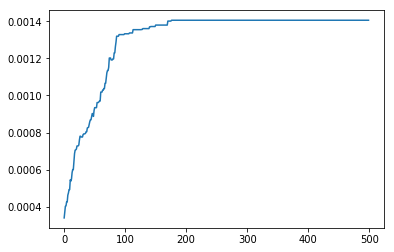

In [12]:
print(mejor_fitness,type(mejor_fitness))
mejor_fitness=np.asarray(mejor_fitness)

plt.plot(mejor_fitness)

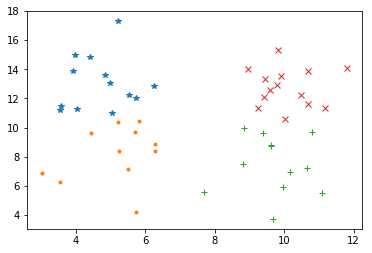

In [13]:
aaa=poblacion[0,:]

d1=np.argwhere(aaa==1)
d2=np.argwhere(aaa==2)
d3=np.argwhere(aaa==3)
d4=np.argwhere(aaa==4)

datos1=Xdata[d1[:,0]]
datos2=Xdata[d2[:,0]]
datos3=Xdata[d3[:,0]]
datos4=Xdata[d4[:,0]]

plt.plot(datos1[:,0],datos1[:,1],'*')
plt.plot(datos2[:,0],datos2[:,1],'.')
plt.plot(datos3[:,0],datos3[:,1],'+')
plt.plot(datos4[:,0],datos4[:,1],'x')
plt.show()